<a href="https://colab.research.google.com/github/dhdessoldi/PCA_ESG_Bitcoin/blob/main/PCA_TCC_REGRESSAO_SEM_CHINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca pandas e o conjunto de dados


In [ ]:
import pandas as pd

In [ ]:
dados_esg = pd.read_csv('/content/Tabela_Regressao_sem_China.csv')

In [ ]:
dados_esg

,country,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,Africa do Sul,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,Alemanha,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,Australia,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,Austria,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,Belgica,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,Brasil,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,Bulgaria,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,Canada,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,Coreia do Sul,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160
9,Espanha,100,38007775,77877000,0.174050,0.226,191870000,0.911,0.954456


In [ ]:
dados_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         28 non-null     object 
 1   nodes                           28 non-null     int64  
 2   emission_co2                    28 non-null     int64  
 3   fossil_fuel_generation_tWh      28 non-null     int64  
 4   emission_intensity_co2_per_kwh  28 non-null     float64
 5   eletricity_cost                 28 non-null     float64
 6   renewables_nuclear_generation   28 non-null     int64  
 7   IDH                             28 non-null     float64
 8   internet_access                 28 non-null     float64
dtypes: float64(4), int64(4), object(1)
memory usage: 2.1+ KB


Criando matriz de correlação a partir das variáveis numéricas

In [ ]:
num_var = dados_esg.drop(['country'], axis=1)

In [ ]:
num_var

,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160
9,100,38007775,77877000,0.174050,0.226,191870000,0.911,0.954456


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

In [ ]:
pg.rcorr(num_var,
         method = 'pearson', upper = 'pval',
         decimals = 4,
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})


,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
nodes,-,***,***,,,***,,
emission_co2,0.8,-,***,,,***,,
fossil_fuel_generation_tWh,0.7918,0.9134,-,,,***,,
emission_intensity_co2_per_kwh,0.0107,0.1702,0.2174,-,,,,
eletricity_cost,0.0073,-0.2483,-0.0797,-0.1547,-,,**,
renewables_nuclear_generation,0.8217,0.8569,0.8806,-0.0455,-0.1393,-,,
IDH,0.1974,-0.0255,0.0652,-0.222,0.4775,0.0279,-,***
internet_access,0.2124,0.1038,0.0748,-0.3146,0.2128,0.0869,0.8534,-


In [ ]:
!pip install statstests

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statstests.process import stepwise

In [ ]:
num_columns = num_var.columns
num_columns

Index(['nodes', 'emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype='object')

In [ ]:
regression_data = pd.DataFrame(num_var, columns=num_columns)
regression_data

,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160
9,100,38007775,77877000,0.174050,0.226,191870000,0.911,0.954456


In [ ]:
x = regression_data[['emission_co2','fossil_fuel_generation_tWh','emission_intensity_co2_per_kwh','eletricity_cost','renewables_nuclear_generation','IDH','internet_access']]

y = regression_data[['nodes']]

In [ ]:
x = sm.add_constant(x)

In [ ]:
model =smf.ols('nodes ~ emission_co2 + fossil_fuel_generation_tWh + emission_intensity_co2_per_kwh + eletricity_cost + renewables_nuclear_generation + IDH + internet_access', data=regression_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     9.099
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           4.67e-05
Time:                        18:49:53   Log-Likelihood:                -189.59
No. Observations:                  28   AIC:                             395.2
Df Residuals:                      20   BIC:                             405.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       -828.5280    796.010     -1.041      0.310   -2488.975     831.919
emission_co2                     1.68e-06   9.67e-07      1.737      0.098   -3.38e-07     3.7e-06
fossil_fuel_generation_tWh     -1.773e-07    3.4e-07     -0.521      0.608   -8.87e-07    5.33e-07
emission_intensity_co2_per_kwh    29.0173    310.084      0.094      0.926    -617.807     675.842
eletricity_cost                  434.6506    586.806      0.741      0.467    -789.405    1658.706
renewables_nuclear_generation   6.562e-07   3.67e-07      1.789      0.089   -1.09e-07    1.42e-06
IDH                             1717.7368   1769.603      0.971      0.343   -1973.590    5409.064
internet_access                 -910.4966   1856.895     -0.490      0.629   -4783.912    2962.919
==============================================================================
Omnibus:                       22.057   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.193
Skew:                           1.571   Prob(JB):                     6.88e-10
Kurtosis:                       8.128   Cond. No.                     3.53e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
step_model = stepwise(model, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('fossil_fuel_generation_tWh') + Q('emission_intensity_co2_per_kwh') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('emission_intensity_co2_per_kwh')" with p-value equal to 0.9263750142837376 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('fossil_fuel_generation_tWh') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('fossil_fuel_generation_tWh')" with p-value equal to 0.5975745721937804 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH') + Q('internet_access')

 Discarding atribute "Q('internet_access')" with p-value equal to 0.7078958995482675 

Estimating model...: 
 nodes ~ Q('emission_co2') + Q('eletricity_cost') + Q('renewables_nuclear_generation') + Q('IDH')

 Discarding atribute "Q('eletri

In [ ]:
tabela_fitted = pd.DataFrame({'paises': dados_esg['country'],
                              'nos_reais': dados_esg['nodes'],
                              'nos_pred': step_model.fittedvalues})

In [ ]:
tabela_fitted

,paises,nos_reais,nos_pred
0,Africa do Sul,30,51.228692
1,Alemanha,1220,298.933073
2,Australia,130,115.799674
3,Austria,66,71.020645
4,Belgica,34,75.321871
5,Brasil,73,691.943194
6,Bulgaria,31,39.418723
7,Canada,362,546.616420
8,Coreia do Sul,82,259.107290
9,Espanha,100,213.308166


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

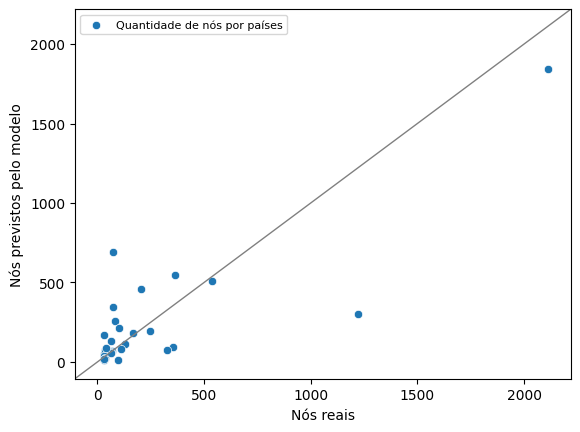

In [ ]:
sns.scatterplot(tabela_fitted, x='nos_reais', y='nos_pred')
plt.xlabel('Nós reais', fontsize=10)
plt.ylabel('Nós previstos pelo modelo', fontsize=10)
plt.axline((0, 0), (max(dados_esg['nodes']), max(dados_esg['nodes'])), linewidth=1, color='grey')
plt.legend(labels=['Quantidade de nós por países'], fontsize=8)
plt.show()

In [ ]:
sm.stats.anova_lm(step_model)

,df,sum_sq,mean_sq,F,PR(>F)
Q('renewables_nuclear_generation'),1.0,3.523037e+06,3.523037e+06,54.047839,8.307809e-08
Residual,26.0,1.694776e+06,6.518368e+04,NaN,NaN


In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=ba6329263e19f673d3072fa6f8a0ced294f204cd31d4e2896eb5d4dd0f4c9abd
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


### Realizando o teste de esfericidade de Bartlett

O teste de esfericidade de Bartlett consiste em comparar a matriz de correlações ρ com uma matriz identidade **I** de mesma dimensão. Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatisticamente diferentes de 0, a determinado nível de significância, poderemos considerar que a extração dos fatores não será adequada.

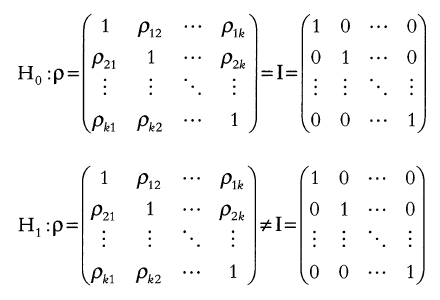

**Obs**: Deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem
distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
num_var = dados_esg.drop(['country','nodes'], axis=1)

In [ ]:
qui_quadrado, pvalue = calculate_bartlett_sphericity(num_var)

In [ ]:
print(qui_quadrado)
print(pvalue)

145.90927864992733
1.0482621216128592e-20


In [ ]:
pvalue < 0.05

np.True_

Como o valor do p-value é menor do que o nível de significância de 5%, podemos rejeitar a hipótese nula de que a matriz de correlação ρ é igual a matriz identidade

In [ ]:
num_var


,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030
1,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764
2,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762
3,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347
4,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263
5,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506
6,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896
7,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000
8,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160
9,38007775,77877000,0.174050,0.226,191870000,0.911,0.954456


### Padronizando as variáveis numéricas

As diferentes escalas das variáveis pode afetar o PCA, portanto vamos padronizar as variáveis pelo método de ZScore.

\begin{align}
z = \frac{x - \mu}{\sigma}
\end{align}

Z = (x - µ)/σ, onde x é o valor a ser transformado, µ é a média da variável e σ é o desvio-padrão da variável.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_columns = num_var.columns
num_columns

Index(['emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype='object')

In [ ]:
standardize = StandardScaler()
num_var = standardize.fit_transform(num_var)
num_var

array([[-0.05230919, -0.0440564 ,  2.01445246, -0.55319203, -0.53227803,
        -2.68047586, -2.66074686],
       [ 0.12632034,  0.04114325,  0.3915196 ,  1.08023316,  0.16604134,
         0.69547482,  0.19652287],
       [-0.08634284, -0.07503146,  1.22469202,  0.21658306, -0.35024182,
         0.63751858,  0.58231714],
       [-0.43694824, -0.41952404, -0.95027842,  1.03329566, -0.47648127,
         0.34773741,  0.65602606],
       [-0.43359754, -0.39588699, -0.81467804,  1.08023316, -0.4643554 ,
         0.57956235,  0.54214297],
       [ 0.09344062, -0.30328475, -1.01216782, -0.90052957,  1.27400148,
        -2.05744633, -1.14194114],
       [-0.45654657, -0.41311318,  0.16492292, -0.96624208, -0.56557228,
        -1.49237304, -1.7465633 ],
       [ 0.09361011, -0.17846778, -0.65608024, -1.1633796 ,  0.86430141,
         0.47813894,  0.44145835],
       [ 0.17776676,  0.34798531,  0.63798446, -1.1164421 ,  0.05376591,
         0.39120458,  0.99061795],
       [-0.25209457, -0.2789

In [ ]:
standardized_data = pd.DataFrame(num_var, columns=num_columns)
standardized_data

,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
0,-0.052309,-0.044056,2.014452,-0.553192,-0.532278,-2.680476,-2.660747
1,0.126320,0.041143,0.391520,1.080233,0.166041,0.695475,0.196523
2,-0.086343,-0.075031,1.224692,0.216583,-0.350242,0.637519,0.582317
3,-0.436948,-0.419524,-0.950278,1.033296,-0.476481,0.347737,0.656026
4,-0.433598,-0.395887,-0.814678,1.080233,-0.464355,0.579562,0.542143
5,0.093441,-0.303285,-1.012168,-0.900530,1.274001,-2.057446,-1.141941
6,-0.456547,-0.413113,0.164923,-0.966242,-0.565572,-1.492373,-1.746563
7,0.093610,-0.178468,-0.656080,-1.163380,0.864301,0.478139,0.441458
8,0.177767,0.347985,0.637984,-1.116442,0.053766,0.391205,0.990618
9,-0.252095,-0.278921,-0.636162,-0.224629,-0.075349,0.130402,0.673854


Realizando o PCA nos dados

O procedimento de análise fatorial consiste primeiramente em obter autovalores (eigenvalues) e autovetores (eigenvectors) da matriz de correlação dos dados.

Logo após isso, o autovetor será dividido pela raiz quadrada do respectivo autovalor, gerando assim os **scores fatoriais** para cada variável e em cada um dos fatores.

Os scores fatoriais são então multiplicados pelas variáveis padronizadas e soma-se os resultados para cada um dos fatores, gerando assim os componentes do PCA.


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_factors = standardized_data.shape[1]
n_factors

7

In [ ]:
pca = PCA(n_components=n_factors)
pca.fit(standardized_data)

PCA(n_components=7)

`pca.explained_variance_ratio_` nos dá a porcentagem de variância explicada por cada um dos fatores gerados pela análise de componentes principais.

In [ ]:
pca.explained_variance_ratio_

array([0.40548231, 0.31634578, 0.13284882, 0.10834123, 0.01892544,
       0.01132281, 0.00673361])

In [ ]:
!pip install matplotlib


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [ ]:
factors = [f'F{i+1}' for i in range(n_factors)]
factors

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7']

In [ ]:
fig = px.bar(x = factors, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

In [ ]:
cumulative_variance = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_factors)]
cumulative_variance

[np.float64(0.40548231070843893),
 np.float64(0.7218280940112543),
 np.float64(0.8546769125105116),
 np.float64(0.9630181435598547),
 np.float64(0.9819435812385363),
 np.float64(0.9932663884915123),
 np.float64(0.9999999999999999)]

In [ ]:
fig = px.bar(x = factors, y = cumulative_variance, text = np.around(cumulative_variance, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

`pca.explained_variance_` representam a quantidade de variáveis explicadas por cada um dos fatores.

O valor mais exato pode ser obtido multiplicando a `pca.explained_variance_ratio_` pela quantidade de fatores.

In [ ]:
pca.explained_variance_


array([2.94350122, 2.29643606, 0.96438402, 0.78647708, 0.13738466,
       0.08219519, 0.04888103])

In [ ]:
pca.explained_variance_*n_factors

array([20.60450853, 16.0750524 ,  6.75068811,  5.50533959,  0.96169261,
        0.57536635,  0.34216722])

In [ ]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_factors))

7.25925925925926
7.000000000000001


In [ ]:
eigenvalues = pca.explained_variance_ratio_ * n_factors
eigenvalues

array([2.83837617, 2.21442048, 0.92994173, 0.75838862, 0.13247806,
       0.07925965, 0.04713528])

Para critério de escolha de quantidade de fatoers, será considerado a quantidade necessária para que a variância explicada seja superior a 90%, portanto 4 fatores

In [ ]:
summary = pd.DataFrame({'Fator': factors, 'Autovalor': eigenvalues, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': cumulative_variance})
summary

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,2.838376,0.405482,0.405482
1,F2,2.214420,0.316346,0.721828
2,F3,0.929942,0.132849,0.854677
3,F4,0.758389,0.108341,0.963018
4,F5,0.132478,0.018925,0.981944
5,F6,0.079260,0.011323,0.993266
6,F7,0.047135,0.006734,1.000000


In [ ]:
pca.components_

array([[ 0.57485066,  0.57122042,  0.11576376, -0.15397262,  0.55185156,
        -0.01630439,  0.03659448],
       [ 0.01377076,  0.0562407 , -0.30879886,  0.37634803,  0.07614671,
         0.62927957,  0.5982154 ],
       [-0.01438991,  0.14547036,  0.82647618,  0.47245482, -0.16650985,
         0.19869382, -0.07176431],
       [-0.03305253,  0.12073574, -0.38155571,  0.72812931,  0.21676304,
        -0.2201285 , -0.46166068],
       [ 0.57349142, -0.05388877, -0.070753  ,  0.23644681, -0.49911257,
        -0.4725679 ,  0.36722843],
       [-0.18084207, -0.4303825 ,  0.23711721,  0.15870734,  0.58776121,
        -0.41442206,  0.42830547],
       [-0.55358945,  0.66833553, -0.03693   , -0.01317675, -0.14273467,
        -0.34747594,  0.32282531]])

Através do resumo, podemos verificar que os quatro primeiros fatores explicam 91,19% da variância total dos dados.

Os pesos que cada variável tem em cada componente principal obtido pela PCA pode ser obtido através de `pca.components_`, são os autovetores extraídos da matriz de correlação

In [ ]:
pca.components_

array([[ 0.57485066,  0.57122042,  0.11576376, -0.15397262,  0.55185156,
        -0.01630439,  0.03659448],
       [ 0.01377076,  0.0562407 , -0.30879886,  0.37634803,  0.07614671,
         0.62927957,  0.5982154 ],
       [-0.01438991,  0.14547036,  0.82647618,  0.47245482, -0.16650985,
         0.19869382, -0.07176431],
       [-0.03305253,  0.12073574, -0.38155571,  0.72812931,  0.21676304,
        -0.2201285 , -0.46166068],
       [ 0.57349142, -0.05388877, -0.070753  ,  0.23644681, -0.49911257,
        -0.4725679 ,  0.36722843],
       [-0.18084207, -0.4303825 ,  0.23711721,  0.15870734,  0.58776121,
        -0.41442206,  0.42830547],
       [-0.55358945,  0.66833553, -0.03693   , -0.01317675, -0.14273467,
        -0.34747594,  0.32282531]])

In [ ]:
pd.DataFrame(pca.components_, columns = num_columns, index = [f'Autovetor {i+1}' for i in range(n_factors)])

,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access
Autovetor 1,0.574851,0.571220,0.115764,-0.153973,0.551852,-0.016304,0.036594
Autovetor 2,0.013771,0.056241,-0.308799,0.376348,0.076147,0.629280,0.598215
Autovetor 3,-0.014390,0.145470,0.826476,0.472455,-0.166510,0.198694,-0.071764
Autovetor 4,-0.033053,0.120736,-0.381556,0.728129,0.216763,-0.220129,-0.461661
Autovetor 5,0.573491,-0.053889,-0.070753,0.236447,-0.499113,-0.472568,0.367228
Autovetor 6,-0.180842,-0.430382,0.237117,0.158707,0.587761,-0.414422,0.428305
Autovetor 7,-0.553589,0.668336,-0.036930,-0.013177,-0.142735,-0.347476,0.322825


In [ ]:
sqrt_eigenvalues = np.sqrt(eigenvalues)
sqrt_eigenvalues

array([1.6847481 , 1.4880929 , 0.96433486, 0.87085511, 0.36397536,
       0.28153091, 0.21710661])

A carga fatorial (factor loading) é a matriz com a correlação dos fatores contra as variáveis originais.
Obtendo as cargas fatoriais a partir dos autovetores e autovalores:

In [ ]:
factor_loadings = pd.DataFrame(pca.components_.T * sqrt_eigenvalues, columns = factors, index = num_columns)
factor_loadings

,F1,F2,F3,F4,F5,F6,F7
emission_co2,0.968479,0.020492,-0.013877,-0.028784,0.208737,-0.050913,-0.120188
fossil_fuel_generation_tWh,0.962363,0.083691,0.140282,0.105143,-0.019614,-0.121166,0.145100
emission_intensity_co2_per_kwh,0.195033,-0.459521,0.797000,-0.332280,-0.025752,0.066756,-0.008018
eletricity_cost,-0.259405,0.560041,0.455605,0.634095,0.086061,0.044681,-0.002861
renewables_nuclear_generation,0.929731,0.113313,-0.160571,0.188769,-0.181665,0.165473,-0.030989
IDH,-0.027469,0.936426,0.191607,-0.191700,-0.172003,-0.116673,-0.075439
internet_access,0.061652,0.890200,-0.069205,-0.402040,0.133662,0.120581,0.070088


Resumo dos fatores F1, F2, F3 e F4 selecionados

In [ ]:
factor_loadings_summary = factor_loadings[['F1','F2','F3', 'F4']].copy()
factor_loadings_summary

,F1,F2,F3,F4
emission_co2,0.968479,0.020492,-0.013877,-0.028784
fossil_fuel_generation_tWh,0.962363,0.083691,0.140282,0.105143
emission_intensity_co2_per_kwh,0.195033,-0.459521,0.797000,-0.332280
eletricity_cost,-0.259405,0.560041,0.455605,0.634095
renewables_nuclear_generation,0.929731,0.113313,-0.160571,0.188769
IDH,-0.027469,0.936426,0.191607,-0.191700
internet_access,0.061652,0.890200,-0.069205,-0.402040


In [ ]:
fig = px.scatter(factor_loadings, x = 'F1', y = 'F2', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [ ]:
fig = px.scatter(factor_loadings, x = 'F1', y = 'F3', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [ ]:
fig = px.scatter(factor_loadings, x = 'F2', y = 'F3', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

In [ ]:
fig = px.scatter(factor_loadings, x = 'F2', y = 'F4', text = factor_loadings.index)
fig.update_traces(textposition = 'top center')
fig.show()

### Verificando as comunalidades de cada uma das variáveis

As comunalidades representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

In [ ]:
factor_loadings_summary['Comunalidades'] = (factor_loadings_summary ** 2).sum(axis = 1)
factor_loadings_summary

,F1,F2,F3,F4,Comunalidades
emission_co2,0.968479,0.020492,-0.013877,-0.028784,0.939392
fossil_fuel_generation_tWh,0.962363,0.083691,0.140282,0.105143,0.963880
emission_intensity_co2_per_kwh,0.195033,-0.459521,0.797000,-0.332280,0.994816
eletricity_cost,-0.259405,0.560041,0.455605,0.634095,0.990589
renewables_nuclear_generation,0.929731,0.113313,-0.160571,0.188769,0.938656
IDH,-0.027469,0.936426,0.191607,-0.191700,0.951111
internet_access,0.061652,0.890200,-0.069205,-0.402040,0.962682


Obtendo os fatores

In [ ]:
pd.DataFrame(pca.transform(standardized_data), columns = factors)

,F1,F2,F3,F4,F5,F6,F7
0,-0.084262,-4.152451,1.144865,0.528022,0.254318,0.076670,0.080828
1,0.062597,0.857551,0.934546,0.430126,-0.041421,0.117270,-0.273043
2,-0.166433,0.420777,1.248032,-0.800881,0.006469,0.152025,-0.033973
3,-1.004537,1.227699,-0.250585,0.596056,0.397976,0.055051,0.141947
4,-0.981894,1.283545,-0.060732,0.585409,0.242701,-0.053848,0.031215
5,0.596773,-1.922951,-1.846441,0.947039,-0.154323,0.843068,-0.040757
6,-0.682252,-2.471099,-0.450738,0.210974,-0.133553,-0.315896,0.018738
7,0.540371,0.386797,-1.199780,-0.743108,-0.660577,0.218607,-0.278533
8,0.606266,0.247713,0.045560,-1.551992,-0.073846,0.085940,0.301500
9,-0.362348,0.572181,-0.678750,-0.302301,0.085797,0.169423,0.162579


In [ ]:
pca2 = PCA(n_components=4)
pd.DataFrame(pca2.fit_transform(standardized_data), columns = ['F1', 'F2','F3','F4'])

,F1,F2,F3,F4
0,-0.084262,-4.152451,1.144865,0.528022
1,0.062597,0.857551,0.934546,0.430126
2,-0.166433,0.420777,1.248032,-0.800881
3,-1.004537,1.227699,-0.250585,0.596056
4,-0.981894,1.283545,-0.060732,0.585409
5,0.596773,-1.922951,-1.846441,0.947039
6,-0.682252,-2.471099,-0.450738,0.210974
7,0.540371,0.386797,-1.199780,-0.743108
8,0.606266,0.247713,0.045560,-1.551992
9,-0.362348,0.572181,-0.678750,-0.302301


Fórmula dos fatores

\begin{align}
\mathbf{F_{1}} = s_{11} * Zx + ... + s_{1n} * Zw
\end{align}
\begin{align}
...
\end{align}
\begin{align}
\mathbf{F_{n}} = s_{n1} * Zx + ... + s_{nn} * Zw
\end{align}

In [ ]:
pca.components_

array([[ 0.57485066,  0.57122042,  0.11576376, -0.15397262,  0.55185156,
        -0.01630439,  0.03659448],
       [ 0.01377076,  0.0562407 , -0.30879886,  0.37634803,  0.07614671,
         0.62927957,  0.5982154 ],
       [-0.01438991,  0.14547036,  0.82647618,  0.47245482, -0.16650985,
         0.19869382, -0.07176431],
       [-0.03305253,  0.12073574, -0.38155571,  0.72812931,  0.21676304,
        -0.2201285 , -0.46166068],
       [ 0.57349142, -0.05388877, -0.070753  ,  0.23644681, -0.49911257,
        -0.4725679 ,  0.36722843],
       [-0.18084207, -0.4303825 ,  0.23711721,  0.15870734,  0.58776121,
        -0.41442206,  0.42830547],
       [-0.55358945,  0.66833553, -0.03693   , -0.01317675, -0.14273467,
        -0.34747594,  0.32282531]])

In [ ]:
pca.feature_names_in_

array(['emission_co2', 'fossil_fuel_generation_tWh',
       'emission_intensity_co2_per_kwh', 'eletricity_cost',
       'renewables_nuclear_generation', 'IDH', 'internet_access'],
      dtype=object)

In [ ]:
F1 = np.zeros(standardized_data.shape[0])
for indice, var in enumerate(pca.feature_names_in_):
    F1 += pca.components_[0][indice] * standardized_data[var]

In [ ]:
F1

,emission_co2
0,-0.084262
1,0.062597
2,-0.166433
3,-1.004537
4,-0.981894
5,0.596773
6,-0.682252
7,0.540371
8,0.606266
9,-0.362348


Para encontrar os scores fatoriais (factor scores), precisamos dividir os autovetores (eigenvectors) pela raiz quadrada dos autovalores (eigenvalues).

In [ ]:
sqrt_eigenvalues

array([1.6847481 , 1.4880929 , 0.96433486, 0.87085511, 0.36397536,
       0.28153091, 0.21710661])

In [ ]:
factor_scores = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    factor_scores[i] = pca.components_[i]/sqrt_eigenvalues[i]

In [ ]:
factor_scores

array([[ 0.34120867,  0.3390539 ,  0.0687128 , -0.09139207,  0.32755731,
        -0.00967764,  0.02172104],
       [ 0.00925396,  0.03779381, -0.20751316,  0.25290627,  0.05117067,
         0.42287654,  0.40200138],
       [-0.01492211,  0.15085046,  0.85704272,  0.48992818, -0.17266808,
         0.20604234, -0.07441845],
       [-0.03795411,  0.13864045, -0.43813915,  0.83610845,  0.24890827,
        -0.25277282, -0.53012341],
       [ 1.57563254, -0.1480561 , -0.19438954,  0.64962313, -1.3712812 ,
        -1.29835136,  1.00893762],
       [-0.64235245, -1.52872204,  0.84224219,  0.56372971,  2.08773248,
        -1.47203043,  1.52134441],
       [-2.54985072,  3.07837483, -0.17010076, -0.06069254, -0.65744044,
        -1.60048529,  1.48694372]])

Podemos encontrar os fatores ao realizar a multiplicação dos scores fatoriais pelas variáveis padronizadas pelo procedimento de zscores.

O primeiro array corresponde aos scores do primeiro fator para cada uma das variáveis.



In [ ]:
F1 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F1 += factor_scores[0][index] * standardized_data[var]

In [ ]:
F1

,emission_co2
0,-0.050015
1,0.037155
2,-0.098788
3,-0.596254
4,-0.582814
5,0.354221
6,-0.404958
7,0.320743
8,0.359856
9,-0.215075


In [ ]:
F2 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F2 += factor_scores[1][index] * standardized_data[var]


In [ ]:
F2

,emission_co2
0,-2.790452
1,0.576275
2,0.282763
3,0.825015
4,0.862544
5,-1.292225
6,-1.660581
7,0.259928
8,0.166464
9,0.384506


In [ ]:
F3 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F3 += factor_scores[2][index] * standardized_data[var]


In [ ]:
F3

,emission_co2
0,1.187207
1,0.969109
2,1.294190
3,-0.259852
4,-0.062978
5,-1.914730
6,-0.467408
7,-1.244153
8,0.047245
9,-0.703853


In [ ]:
F4 = np.zeros(standardized_data.shape[0])
for index, var in enumerate(pca.feature_names_in_):
    F4 += factor_scores[3][index] * standardized_data[var]

In [ ]:
F4

,emission_co2
0,0.606326
1,0.493912
2,-0.919649
3,0.684449
4,0.672223
5,1.087482
6,0.242261
7,-0.853309
8,-1.782148
9,-0.347132


In [ ]:
factor_data = dados_esg[['country']].copy()
factor_data['F1'] = F1
factor_data['F2'] = F2
factor_data['F3'] = F3
factor_data['F4'] = F4


factor_data

,country,F1,F2,F3,F4
0,Africa do Sul,-0.050015,-2.790452,1.187207,0.606326
1,Alemanha,0.037155,0.576275,0.969109,0.493912
2,Australia,-0.098788,0.282763,1.294190,-0.919649
3,Austria,-0.596254,0.825015,-0.259852,0.684449
4,Belgica,-0.582814,0.862544,-0.062978,0.672223
5,Brasil,0.354221,-1.292225,-1.914730,1.087482
6,Bulgaria,-0.404958,-1.660581,-0.467408,0.242261
7,Canada,0.320743,0.259928,-1.244153,-0.853309
8,Coreia do Sul,0.359856,0.166464,0.047245,-1.782148
9,Espanha,-0.215075,0.384506,-0.703853,-0.347132


In [ ]:
dados_esg['F1'] = F1
dados_esg['F2'] = F2
dados_esg['F3'] = F3
dados_esg['F4'] = F4



In [ ]:
dados_esg

,country,nodes,emission_co2,fossil_fuel_generation_tWh,emission_intensity_co2_per_kwh,eletricity_cost,renewables_nuclear_generation,IDH,internet_access,F1,F2,F3,F4
0,Africa do Sul,30,68071135,190604000,0.707690,0.191,37750000,0.717,0.747030,-0.050015,-2.790452,1.187207,0.606326
1,Alemanha,1220,94950999,231497000,0.380950,0.365,273290000,0.950,0.924764,0.037155,0.576275,0.969109,0.493912
2,Australia,130,62949810,175737000,0.548690,0.273,99150000,0.946,0.948762,-0.098788,0.282763,1.294190,-0.919649
3,Austria,66,10191312,10392000,0.110810,0.360,56570000,0.926,0.953347,-0.596254,0.825015,-0.259852,0.684449
4,Belgica,34,10695520,21737000,0.138110,0.365,60660000,0.942,0.946263,-0.582814,0.862544,-0.062978,0.672223
5,Brasil,73,90003316,66183000,0.098350,0.154,647000000,0.760,0.841506,0.354221,-1.292225,-1.914730,1.087482
6,Bulgaria,31,7242189,13469000,0.335330,0.147,26520000,0.799,0.803896,-0.404958,-1.660581,-0.467408,0.242261
7,Canada,362,90028820,126091000,0.170040,0.126,508810000,0.935,0.940000,0.320743,0.259928,-1.244153,-0.853309
8,Coreia do Sul,82,102692568,378771000,0.430570,0.131,235420000,0.929,0.974160,0.359856,0.166464,0.047245,-1.782148
9,Espanha,100,38007775,77877000,0.174050,0.226,191870000,0.911,0.954456,-0.215075,0.384506,-0.703853,-0.347132


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Regressão linear múltipla

In [ ]:
nodes = pd.read_csv('/content/Nodes_sem_China.csv')

In [ ]:
nodes

,countries,nodes
0,Africa do Sul,30
1,Alemanha,1220
2,Australia,130
3,Austria,66
4,Belgica,34
5,Brasil,73
6,Bulgaria,31
7,Canada,362
8,Coreia do Sul,82
9,Espanha,100


In [ ]:
nodes['F1'] = F1
nodes['F2'] = F2
nodes['F3'] = F3
nodes['F4'] = F4

In [ ]:
nodes

,countries,nodes,F1,F2,F3,F4
0,Africa do Sul,30,-0.050015,-2.790452,1.187207,0.606326
1,Alemanha,1220,0.037155,0.576275,0.969109,0.493912
2,Australia,130,-0.098788,0.282763,1.294190,-0.919649
3,Austria,66,-0.596254,0.825015,-0.259852,0.684449
4,Belgica,34,-0.582814,0.862544,-0.062978,0.672223
5,Brasil,73,0.354221,-1.292225,-1.914730,1.087482
6,Bulgaria,31,-0.404958,-1.660581,-0.467408,0.242261
7,Canada,362,0.320743,0.259928,-1.244153,-0.853309
8,Coreia do Sul,82,0.359856,0.166464,0.047245,-1.782148
9,Espanha,100,-0.215075,0.384506,-0.703853,-0.347132


In [ ]:
num_var = nodes.drop(['countries'], axis=1)

In [ ]:
num_var

,nodes,F1,F2,F3,F4
0,30,-0.050015,-2.790452,1.187207,0.606326
1,1220,0.037155,0.576275,0.969109,0.493912
2,130,-0.098788,0.282763,1.294190,-0.919649
3,66,-0.596254,0.825015,-0.259852,0.684449
4,34,-0.582814,0.862544,-0.062978,0.672223
5,73,0.354221,-1.292225,-1.914730,1.087482
6,31,-0.404958,-1.660581,-0.467408,0.242261
7,362,0.320743,0.259928,-1.244153,-0.853309
8,82,0.359856,0.166464,0.047245,-1.782148
9,100,-0.215075,0.384506,-0.703853,-0.347132


In [ ]:
columns = num_var.columns

In [ ]:
columns

Index(['nodes', 'F1', 'F2', 'F3', 'F4'], dtype='object')

In [ ]:
regression_data = pd.DataFrame(num_var, columns=columns)
regression_data

,nodes,F1,F2,F3,F4
0,30,-0.050015,-2.790452,1.187207,0.606326
1,1220,0.037155,0.576275,0.969109,0.493912
2,130,-0.098788,0.282763,1.294190,-0.919649
3,66,-0.596254,0.825015,-0.259852,0.684449
4,34,-0.582814,0.862544,-0.062978,0.672223
5,73,0.354221,-1.292225,-1.914730,1.087482
6,31,-0.404958,-1.660581,-0.467408,0.242261
7,362,0.320743,0.259928,-1.244153,-0.853309
8,82,0.359856,0.166464,0.047245,-1.782148
9,100,-0.215075,0.384506,-0.703853,-0.347132


Definição das variáveis independentes X e da variável dependente Y

In [ ]:
x = regression_data[['F1','F2','F3','F4']]

y = regression_data[['nodes']]

In [ ]:
X = sm.add_constant(x)

In [ ]:
model =sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     16.01
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.13e-06
Time:                        18:54:10   Log-Likelihood:                -190.99
No. Observations:                  28   AIC:                             392.0
Df Residuals:                      23   BIC:                             398.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.0357     46.266      5.188      0.000     144.327     335.745
F1           349.4498     46.266      7.553      0.000     253.741     445.159
F2           109.8811     46.266      2.375      0.026      14.172     205.590
F3            -7.5331     46.266     -0.163      0.872    -103.242      88.176
F4            53.5887     46.266      1.158      0.259     -42.120     149.298
==============================================================================
Omnibus:                       28.935   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.947
Skew:                           2.032   Prob(JB):                     6.47e-16
Kurtosis:                       9.591   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model =smf.ols('nodes ~ F1 + F2 + F3 + F4', data=regression_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  nodes   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     16.01
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           2.13e-06
Time:                        18:54:17   Log-Likelihood:                -190.99
No. Observations:                  28   AIC:                             392.0
Df Residuals:                      23   BIC:                             398.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    240.0357     46.266      5.188      0.000     144.327     335.745
F1           349.4498     46.266      7.553      0.000     253.741     445.159
F2           109.8811     46.266      2.375      0.026      14.172     205.590
F3            -7.5331     46.266     -0.163      0.872    -103.242      88.176
F4            53.5887     46.266      1.158      0.259     -42.120     149.298
==============================================================================
Omnibus:                       28.935   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.947
Skew:                           2.032   Prob(JB):                     6.47e-16
Kurtosis:                       9.591   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
step_model = stepwise(model, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2') + Q('F3') + Q('F4')

 Discarding atribute "Q('F3')" with p-value equal to 0.8720811825577808 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2') + Q('F4')

 Discarding atribute "Q('F4')" with p-value equal to 0.24859122559158467 

Estimating model...: 
 nodes ~ Q('F1') + Q('F2')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('F3')", 'p-value': 0.8720811825577808}
{'atribute': "Q('F4')", 'p-value': 0.24859122559158467}

 Model after stepwise process...: 
 nodes ~ Q('F1') + Q('F2') 

                            OLS Regression Results                            
Dep. Variable:                  nodes   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     32.16
Date:                Thu, 28 Aug 2025   Prob (F-statistic):     

In [ ]:
tabela_fitted = pd.DataFrame({'paises': dados_esg['country'],
                              'nos_reais': dados_esg['nodes'],
                              'nos_pred': step_model.fittedvalues})

In [ ]:
tabela_fitted

,paises,nos_reais,nos_pred
0,Africa do Sul,30,-84.059925
1,Alemanha,1220,316.341351
2,Australia,130,236.584544
3,Austria,66,122.328541
4,Belgica,34,131.148875
5,Brasil,73,221.826939
6,Bulgaria,31,-83.943308
7,Canada,362,380.680421
8,Coreia do Sul,82,384.078421
9,Espanha,100,207.127587
